# Data Scientist Salary Prediction

![](https://pianalytix.com/wp-content/uploads/2020/12/Salary-Prediction-Model-using-ML.jpg)

In [ ]:
# import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# df=pd.read_csv("")
df=pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# About Dataset- 

**work_year**- The year during which the salary was paid. There are two types of work year values:
- 2020
Year with a definitive amount from the past
- 2021e
Year with an estimated amount (e.g. current year)

**experience_level**- The experience level in the job during the year with the following possible values:
- EN
Entry-level / Junior
- MI
Mid-level / Intermediate
- SE
Senior-level / Expert
- EX
Executive-level / Director

**employment_type**-The type of employement for the role:
- PT
Part-time
- FT
Full-time
- CT
Contract
- FL
Freelance

**job_title**- The role worked in during the year.
- salary
- The total gross salary amount paid.

**salary_currency**- The currency of the salary paid as an ISO 4217 currency code.

**salary_in_usd**- The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

**employee_residence**- Employee's primary country of residence in during the work year as an ISO 3166 country code.

**remote_ratio**- The overall amount of work done remotely, possible values are as follows:
- 0
No remote work (less than 20%)
- 50
Partially remote
- 100
Fully remote (more than 80%)

**company_location**-The country of the employer's main office or contracting branch as an ISO 3166 country code.

**company_size** The average number of people that worked for the company during the year:
- S
less than 50 employees (small)
- M
50 to 250 employees (medium)
- L
more than 250 employees (large)

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 607 entries, 0 to 606

Data columns (total 12 columns):

 #   Column              Non-Null Count  Dtype 

---  ------              --------------  ----- 

 0   Unnamed: 0          607 non-null    int64 

 1   work_year           607 non-null    int64 

 2   experience_level    607 non-null    object

 3   employment_type     607 non-null    object

 4   job_title           607 non-null    object

 5   salary              607 non-null    int64 

 6   salary_currency     607 non-null    object

 7   salary_in_usd       607 non-null    int64 

 8   employee_residence  607 non-null    object

 9   remote_ratio        607 non-null    int64 

 10  company_location    607 non-null    object

 11  company_size        607 non-null    object

dtypes: int64(5), object(7)

memory usage: 57.0+ KB


No null value here so we are going further.

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)       #remove unanmed: 0  bcoz  of no use
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.shape

(607, 11)

In [ ]:
#Experience level-effect a lot on job salary so analysis it more 
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [ ]:
#replacing abbrevations
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})


In [ ]:
#replacing abbrevations
df['experience_level'].unique()

array(['Mid', 'Senior', 'Entry', 'Executive'], dtype=object)

In [ ]:
# employment type
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [ ]:
#replacing abbrevations
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [ ]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [ ]:
# company size
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [ ]:
#replacing abbrevations
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

In [ ]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [ ]:
#work year
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [ ]:
#remote ratio
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [ ]:
# renmame remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)

# change 100 to remote, 0 to onsite, 50 to hybrid
df['job_type'] = df['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

In [ ]:
df['job_type'].value_counts()

remote    381
onsite    127
hybrid     99
Name: job_type, dtype: int64

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,DE,onsite,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,onsite,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,hybrid,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,onsite,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,hybrid,US,Large


#### Now we get good data-set but we can't understand 'employee_residence' and 'company_location' so we change the short form of country name to full form by ISO Country code

In [ ]:
# change country names from ISO2 to original names
# There are two features containing country names, "company_location" and "employee_residence"
# country converter-https://vincentarelbundock.github.io/countrycode/
!pip install country_converter
import country_converter
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/








In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,hybrid,United States,Large


# Data Visualization

In [ ]:
df.describe()

,work_year,salary
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


mean salary is $112297

max salary is $600000




In [ ]:
#now we see graph beetween experince v/s salary
exp_salary = df.groupby('experience_level')['salary'].mean().sort_values()
exp_salary

experience_level
Entry         61643.318182
Mid           87996.056338
Senior       138617.292857
Executive    199392.038462
Name: salary, dtype: float64

Text(0.5, 1.0, 'Mean Salary Vs Experience Level')

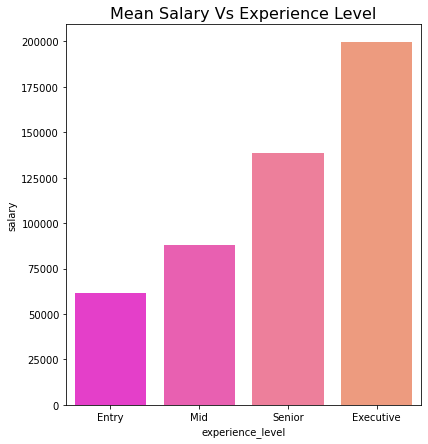

In [ ]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=exp_salary.index, y=exp_salary)
ax.set_title('Mean Salary Vs Experience Level', fontdict={'fontsize': 16})


#                         Salary v/s Employement type


In [ ]:
salary_emp_type = df.groupby('employment_type')['salary'].mean().sort_values()
salary_emp_type

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    113468.073129
Contract     184575.000000
Name: salary, dtype: float64

#### FOUND-contract base salary is highest.

Text(0.5, 1.0, 'Employment Type VS Salary')

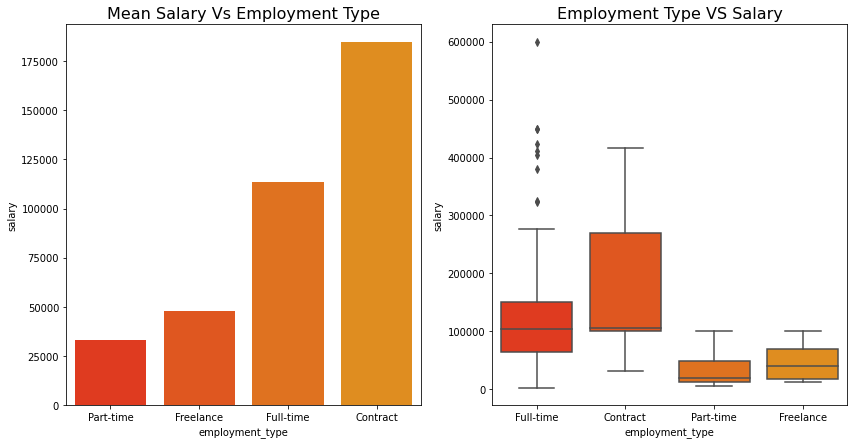

In [ ]:
plt.figure(figsize=(14, 7))
sns.set_palette('autumn')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=salary_emp_type.index, y=salary_emp_type)
ax.set_title('Mean Salary Vs Employment Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize': 16})

#### FOUND-contract base salary is highest and part time salary is lowest.

# Salary VS Company Size

In [ ]:
# mean salary of employees from different company sizes
salary_cmp_size = df.groupby('company_size')['salary'].mean().sort_values()
salary_cmp_size

company_size
Small      77632.674699
Medium    116905.466258
Large     119242.994949
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

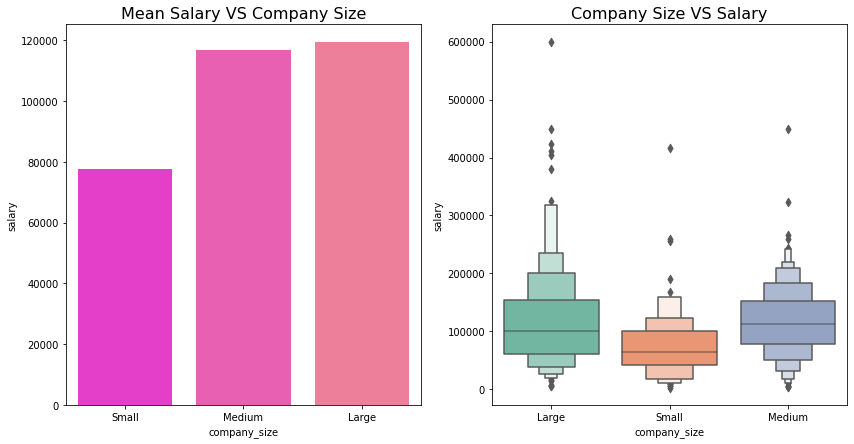

In [ ]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=salary_cmp_size.index, y=salary_cmp_size)
ax.set_title('Mean Salary VS Company Size', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize': 16})

#### Company Size VS Salary:
- Large companies have highest mean salary and those who work at small ones have the lowest mean salary.



# Salary VS Job type (remote, hybrid, onsite)

In [ ]:
# mean salary of employees with different job types
salary_jtype = df.groupby('job_type')['salary'].mean().sort_values()
salary_jtype

job_type
hybrid     80823.030303
onsite    106354.622047
remote    122457.454068
Name: salary, dtype: float64

Text(0.5, 1.0, 'Mean Salary VS Job Type')

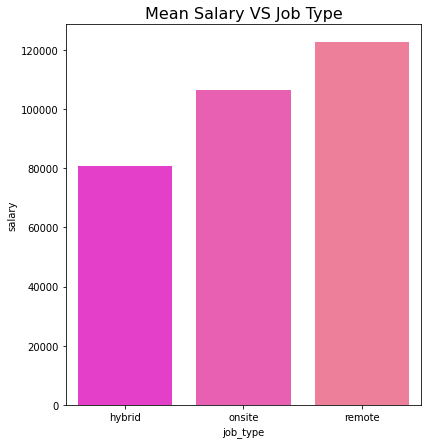

In [ ]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=salary_jtype.index, y=salary_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize': 16})


#### Job Type (remote, on-site or hybrid) VS Salary:
- remotely have a higher mean salary than those who work on-site, and hybrid workers have a lower mean salary.

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

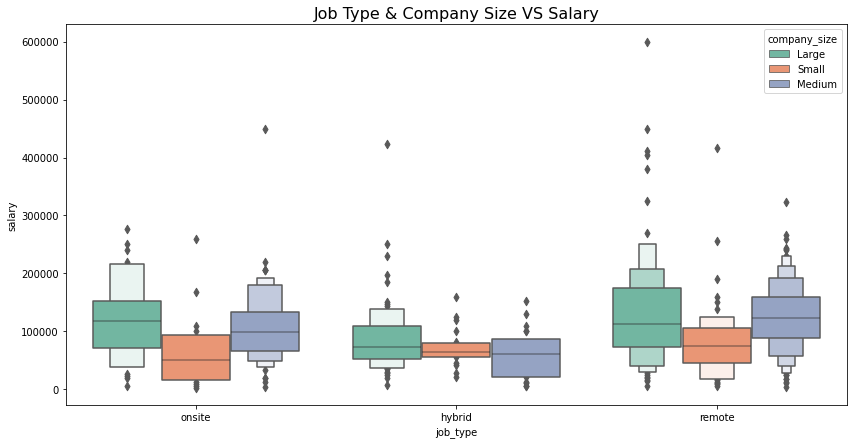

In [ ]:
# job type and company size VS salary
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='job_type', y='salary', hue='company_size')
ax.set_title('Job Type & Company Size VS Salary', fontdict={'fontsize': 16})

#### so, prefer to work remotely at a large company to get higher salary.

# Job Types and Experience Level distributions (Pie)

Text(0, 0.5, '')

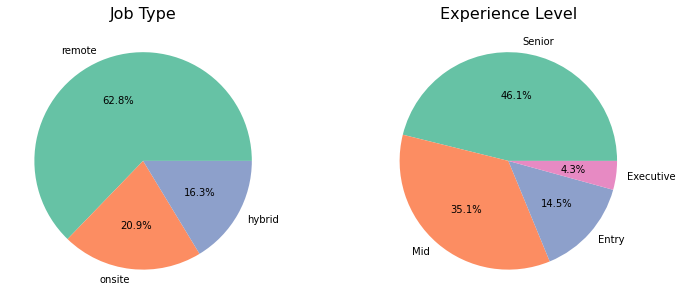

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_palette('Set2')

# job types
plt.subplot(1,2,1)
ax = df['job_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Job Type', fontdict={'fontsize': 16})
ax.set_ylabel('')

# experience levels
plt.subplot(1,2,2)
ax = df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Experience Level', fontdict={'fontsize': 16})
ax.set_ylabel('')

- Remote jobs have the highest persent of openings.

- Share of Job openings for employees with an experience level of Senior is the the highest here.

# Company Size VS Job Types Counts

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

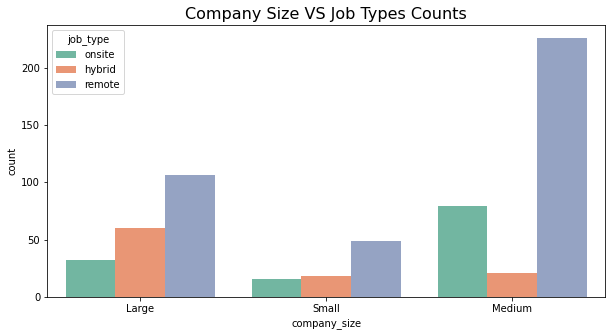

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
ax = sns.countplot(data=df, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts', fontdict={'fontsize': 16})

- In all companies, the number of remote workers is higher than that of hybrid and on-site.

- The number of hybrid workers in small and large companies is higher than that of on-site, whereas in medium-sized companies, more people work on-site than hybrid.

# Top 10 Data Science Roles

In [ ]:
# top 10 data science roles according to mean salary
top_ds_roles = df.groupby('job_title')['salary'].mean().sort_values(ascending=False)
top_ds_roles=top_ds_roles.head(10)
top_ds_roles

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top DS roles according to mean salary')

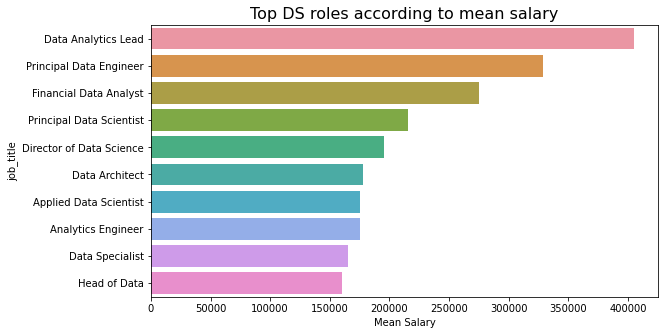

In [ ]:
# top 10 data science roles according to mean salary and counts 
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
top_ds_roles = top_ds_roles
ax = sns.barplot(y=top_ds_roles.index, x=top_ds_roles)
ax.set_xlabel('Mean Salary')
ax.set_title('Top DS roles according to mean salary', fontdict={'fontsize': 16})


Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

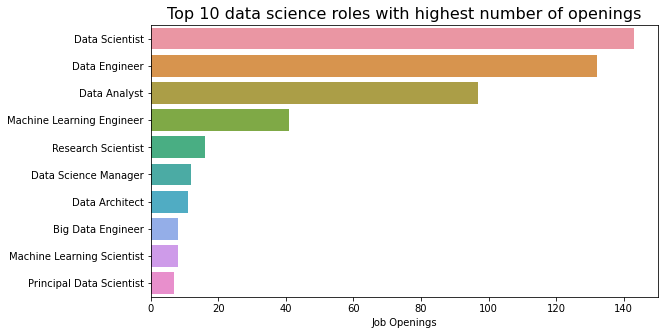

In [ ]:
# top 10 data science roles with highest number of openings
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
top_dr = df['job_title'].value_counts()[:10]

ax = sns.barplot(x=top_dr, y=top_dr.index)
ax.set_xlabel('Job Openings')
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16})

# Top 10 campany-locations

In [ ]:
# top 10 company-locations according to mean salary
top_cmp_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_locations

company_location
Russia                  157500.000000
United States           144055.261972
New Zealand             125000.000000
Israel                  119059.000000
Japan                   114127.333333
Australia               108042.666667
Iraq                    100000.000000
United Arab Emirates    100000.000000
Algeria                 100000.000000
Canada                   99823.733333
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 countries according to DS mean salaries')

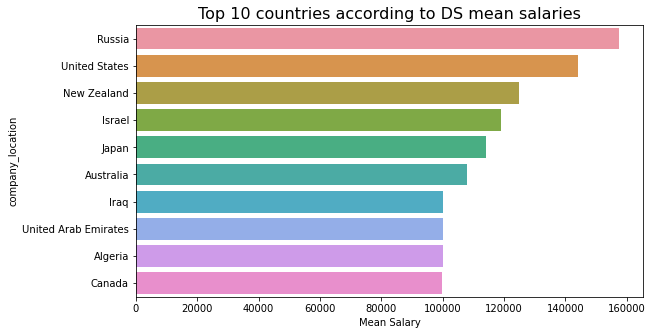

In [ ]:
# top 10 company-locations according to mean salary
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_cmp_locations.index, x=top_cmp_locations)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 countries according to DS mean salaries', fontdict={'fontsize': 16})


#### Russia, the United States and New Zealand are the highest paying countries for data science roles according to this dataset.

Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

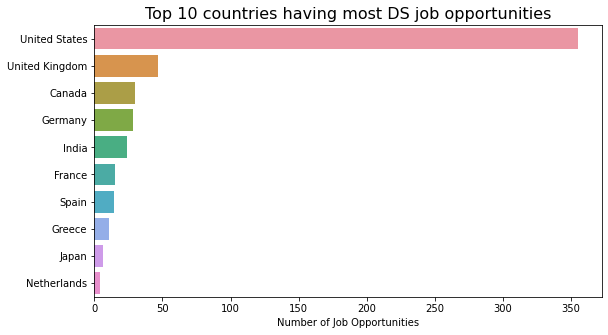

In [ ]:
# top 10 company-locations having most job opportunities
plt.figure(figsize=(20, 5))
top_cl = df['company_location'].value_counts()[:10]
plt.subplot(1, 2, 2)
ax = sns.barplot(x=top_cl, y=top_cl.index)
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

#### The US, The UK and Canada are the top three countries offering highest number of Data Science job.

# Machine Learning

# Linear Regression Algorithm 

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.shape

(607, 9)

In [ ]:
X = df[['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'job_type', 'company_location', 'company_size']] 

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,work_year,experience_level_Executive,experience_level_Mid,experience_level_Senior,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,...,company_location_Spain,company_location_Switzerland,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Medium,company_size_Small
0,2020,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2020,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Y = df['salary']
Y.head()

0     79833
1    260000
2    109024
3     20000
4    150000
Name: salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(424, 165)

(183, 165)

(424,)

(183,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# print the intercept
print(model.intercept_)

22699571.185054045


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
work_year,-1.133704e+04
experience_level_Executive,1.109111e+05
experience_level_Mid,3.542231e+04
experience_level_Senior,5.231098e+04
employment_type_Freelance,-2.573769e+05
...,...
company_location_United Kingdom,1.780406e+17
company_location_United States,1.780406e+17
company_location_Vietnam,0.000000e+00
company_size_Medium,9.986119e+02


In [ ]:
predictions = model.predict(X_test)
predictions

array([ 4.08191851e+04,  1.78040571e+17,  1.05654286e+05,  1.16051185e+05,
        1.16051185e+05,  1.12243185e+05,  5.81900560e+04,  8.82431851e+04,
        6.43123185e+05,  1.50271851e+04,  1.16051185e+05,  1.47827185e+05,
        1.45587185e+05,  5.41767421e+04,  1.46675185e+05,  1.16051185e+05,
        1.35664391e+03,  1.35347185e+05,  1.88659185e+05,  1.47827185e+05,
        9.91551851e+04,  1.99477303e+04,  1.52243185e+05,  1.37107185e+05,
        5.41767421e+04,  9.91551851e+04,  1.46803185e+05, -8.82368149e+04,
       -1.78040571e+17,  1.45587185e+05,  1.47827185e+05, -1.96608149e+04,
        2.01632964e+05,  8.28074714e+04,  9.60191851e+04,  1.16051185e+05,
        1.47827185e+05,  3.14643185e+05,  1.45587185e+05,  1.61107185e+05,
        3.27485975e+05,  1.47827185e+05,  1.45587185e+05,  6.32815637e+04,
        5.41767421e+04,  1.59155185e+05,  1.49011185e+05,  1.67477303e+04,
        9.25311851e+04,  1.20467185e+05,  1.02032930e+05, -1.08189474e+06,
        9.49052555e+04,  

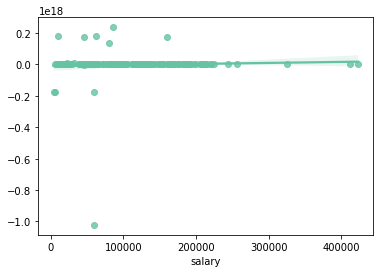

In [ ]:
sns.regplot(y_test,predictions)

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            


Dep. Variable:                 salary   R-squared:                       0.723

Model:                            OLS   Adj. R-squared:                  0.610

Method:                 Least Squares   F-statistic:                     6.429

Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.57e-39

Time:                        03:02:06   Log-Likelihood:                -5070.7

No. Observations:                 424   AIC:                         1.039e+04

Df Residuals:                     301   BIC:                         1.089e+04

Df Model:                         122                                         

Covariance Type:            nonrobust                                         


                                                         coef    std err          t      P>|t|      [0.025      0.975]

------------------------------------------------------------------------------

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
score = mean_absolute_error(y_test, predictions)
print('MAE:', score)

MAE: 1.4606372005938126e+16


# Conclusion: 
I have analysed the dataset from kaggle. According to my data analysis-

- The US, the UK, and Canada offer the highest number of data science jobs.
- Remote work at large companies is associated with higher salaries.
- Remote workers have a higher mean salary than on-site workers, while hybrid workers have a lower mean salary.
- Contract-based salaries tend to be the highest, while part-time salaries are the lowest.
- Linear regression analysis yielded a mean absolute error (MAE) of 1.4606 and an R-squared value of 0.723.

# Message for all Aspiring Data Scientists:

- Consider focusing your job search in the US, UK, or Canada, as these countries offer the highest number of data science jobs.

- Consider seeking remote work opportunities at large companies, as this is associated with higher salaries.

- Be aware that remote work generally pays more than on-site work, while hybrid work pays less.

- Be open to contract-based work opportunities, as these tend to pay the highest salaries.

- Continuously build and refine your skills in data science, including knowledge of linear regression and other statistical techniques, to enhance your ability to analyze and interpret data.

- Network with other data scientists and seek mentorship opportunities to learn from experienced professionals in the field.

- Finally, keep in mind that salary is just one aspect of a job, and it's important to consider other factors such as job satisfaction, work-life balance, and opportunities for growth and advancement when evaluating career options.






**<p style="text-align: center;">Thank you for watching</p>**

<div align="center">
    <img src="https://media.istockphoto.com/id/1271311350/vector/thank-you-ink-brush-vector-lettering-thank-you-modern-phrase-handwritten-vector-calligraphy.jpg?s=170667a&w=0&k=20&c=Eg4bFWWExINAGdrJlidWBq1NGczOQhHPGZFvG40yYMU=">
</div>